# **Import Libraries**

In [20]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # << INI WAJIB!
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import randint

# **Load Dataset**

In [21]:
# Load data dengan pemisah ;
data = pd.read_csv('cardio_train.csv', sep=';')

# Tampilkan 5 data pertama
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:
# Info tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [23]:
# Statistik deskriptif
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis (EDA)**

In [24]:
# Cek distribusi target
data['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


In [25]:
# Konversi umur dari hari ke tahun
data['age_years'] = (data['age'] / 365).round(1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  age_years    70000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


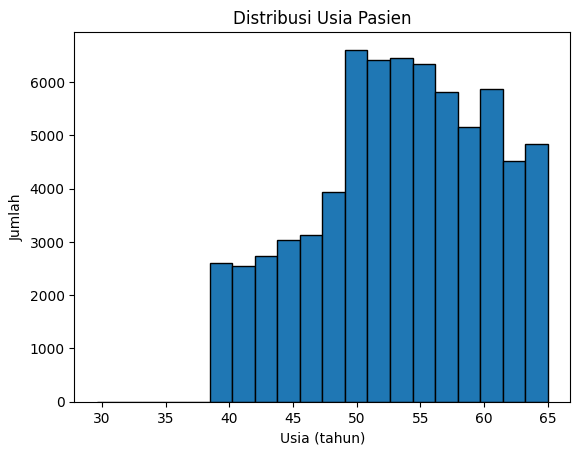

In [27]:
# Visualisasi distribusi usia
plt.hist(data['age_years'], bins=20, edgecolor='k')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia (tahun)')
plt.ylabel('Jumlah')
plt.show()

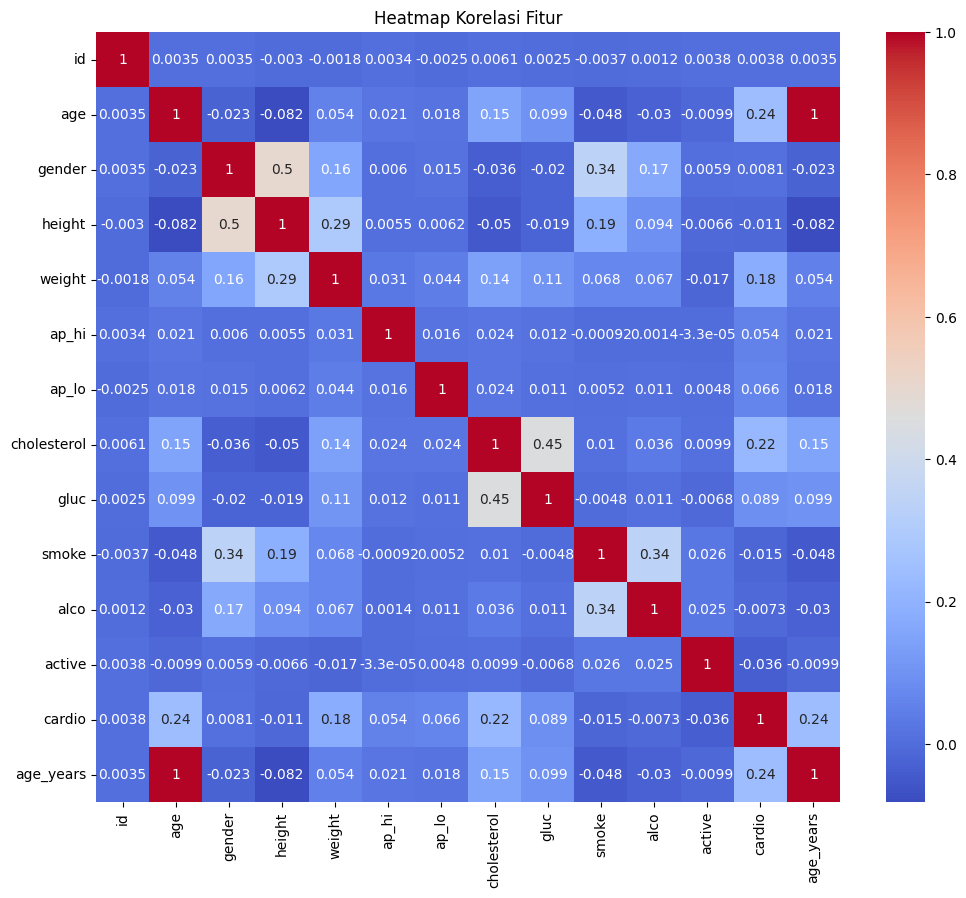

In [28]:
# Heatmap korelasi
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **Data Preparation**

In [29]:
# Drop kolom id dan ubah age ke tahun
data = data.drop('id', axis=1)
data['age'] = (data['age'] / 365).round(1)

In [30]:
# Feature dan Target
X = data.drop('cardio', axis=1)
y = data['cardio']

In [31]:
# One-hot encoding untuk gender, cholesterol, gluc
X = pd.get_dummies(X, columns=['gender', 'cholesterol', 'gluc'], drop_first=True)

In [32]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,50.4
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,55.4
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,51.7
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,48.3
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,47.9


# **Modeling**

In [35]:
# Model 1: Baseline - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [36]:
# Define distribusi parameter untuk Randomized Search
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Buat RandomizedSearchCV
rand_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,                # Coba 20 kombinasi random
    cv=5,                     # 5-fold cross validation
    n_jobs=-1,                 # Gunakan semua CPU
    random_state=42,
    scoring='accuracy',
    verbose=2
)

# Fit ke data train
rand_search.fit(X_train, y_train)

# Model terbaik hasil tuning
best_rf_random = rand_search.best_estimator_
print("Best Parameters dari RandomizedSearchCV:", rand_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters dari RandomizedSearchCV: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 269}


# **Evaluation**

In [37]:
# Decision Tree Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6292857142857143
Decision Tree ROC-AUC: 0.629809493725859
Confusion Matrix:
 [[4387 2601]
 [2589 4423]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      6988
           1       0.63      0.63      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [38]:
# Evaluasi di data test
y_pred_rf_random = best_rf_random.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_random))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, best_rf_random.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_random))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_random))

Random Forest Accuracy: 0.7402142857142857
Random Forest ROC-AUC: 0.8024761950320833
Confusion Matrix:
 [[5461 1527]
 [2110 4902]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

